# Study On Wine Quality Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from matplotlib import pyplot
import statsmodels.api as sm 
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn import model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
import scipy
from sklearn.preprocessing import  StandardScaler
from mlxtend.classifier import StackingCVClassifier

In [3]:
data = pd.read_csv('Downloads\winequality-red.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Tabulation
data['tab'] = pd.cut(data['alcohol'], bins=[0,2,4,6,8,10,12,14,16,18,2000],
                        include_lowest=True, labels=['0-2','2-4','4-6','6-8','8-10','10-12','12-14','14-16','16-18','18'])
pd.DataFrame(data['tab'].value_counts().sort_values(ascending=True))

# Exploratory Data Analysis

In [138]:
#summary of dataset

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [139]:
#column names
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [140]:
#data types
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

# Missing Value treatment

In [141]:
data.isnull().sum().sort_values(ascending=True)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [142]:
# information about data columns and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null object
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [143]:
#count the number of rating
print(data['quality'].unique())
Counter(data['quality'])

['0' '1']


Counter({'0': 744, '1': 855})

# Outlier Detection

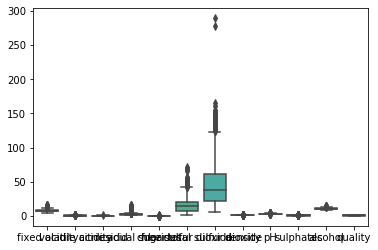

In [144]:
sns.boxplot(data=data)
plt.show()
#here we observe that there are outliers in data.so we remove outliers

In [145]:
out=[]
def outlier(df, field_name):
    for y in df[field_name]:
        z_score= (y - np.mean(df[field_name]))/np.std(df[field_name]) 
        if np.abs(z_score) > 3:
            out.append(y)
    return out
outlier(data, "fixed acidity")

[15.0, 15.0, 13.8, 14.0, 13.7, 13.7, 15.6, 14.3, 15.5, 15.5, 15.6, 15.9]

In [4]:
def outliers(data,f):
    data[f],fitted_lambda= scipy.stats.boxcox(data[f] ,lmbda=None)
outliers(data, "fixed acidity")
outliers(data, "volatile acidity")
outliers(data, "residual sugar")
outliers(data, "chlorides")
outliers(data, "free sulfur dioxide")
outliers(data, "total sulfur dioxide")
outliers(data, "density")
outliers(data, "pH")
outliers(data, "sulphates")
outliers(data, "alcohol")

In [147]:
out=[]
def outlier(df, field_name):
    for y in df[field_name]:
        z_score= (y - np.mean(df[field_name]))/np.std(df[field_name]) 
        if np.abs(z_score) > 3:
            out.append(y)
    return out

outlier(data, "fixed acidity")

[0.9564973370931573, 0.9641942073669719, 0.9787971189411893]

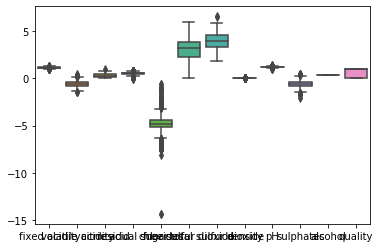

In [148]:
sns.boxplot(data=data)
plt.show()
#here we observe there is no outlier

# Data Visualization

Text(0.5, 0, 'quality rating')

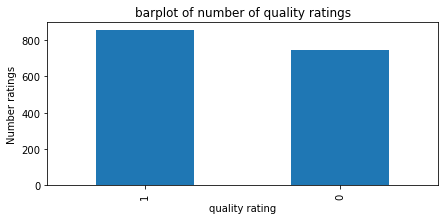

In [149]:
#bar plot
data['quality'].value_counts().plot(kind='bar', figsize=(7,3))
plt.title("barplot of number of quality ratings")
plt.ylabel('Number ratings')
plt.xlabel('quality rating')

#here we observe that more number of people gave 5 rating

Text(0.5, 1.0, 'pie plot of percentage of quality ratings')

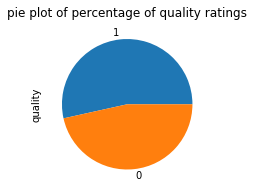

In [150]:
#pie plot
data['quality'].value_counts().nlargest(5).plot(kind='pie', figsize=(7,3))
plt.title("pie plot of percentage of quality ratings")

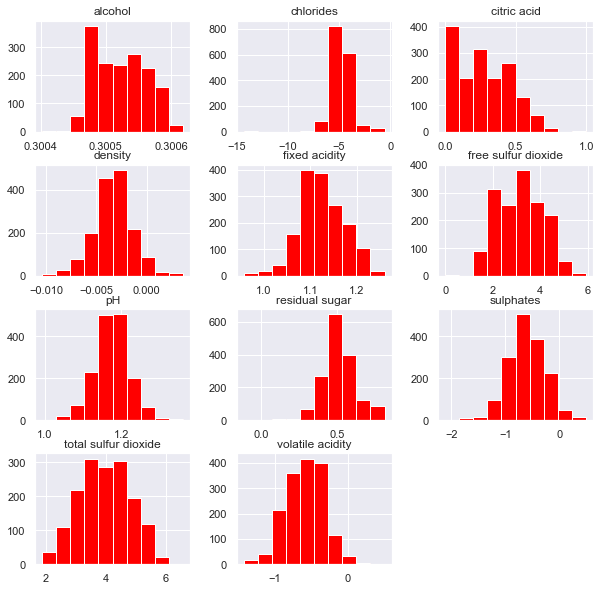

In [151]:
import seaborn as sns
sns.set()
data.hist(figsize=(10,10),color='red')
plt.show()


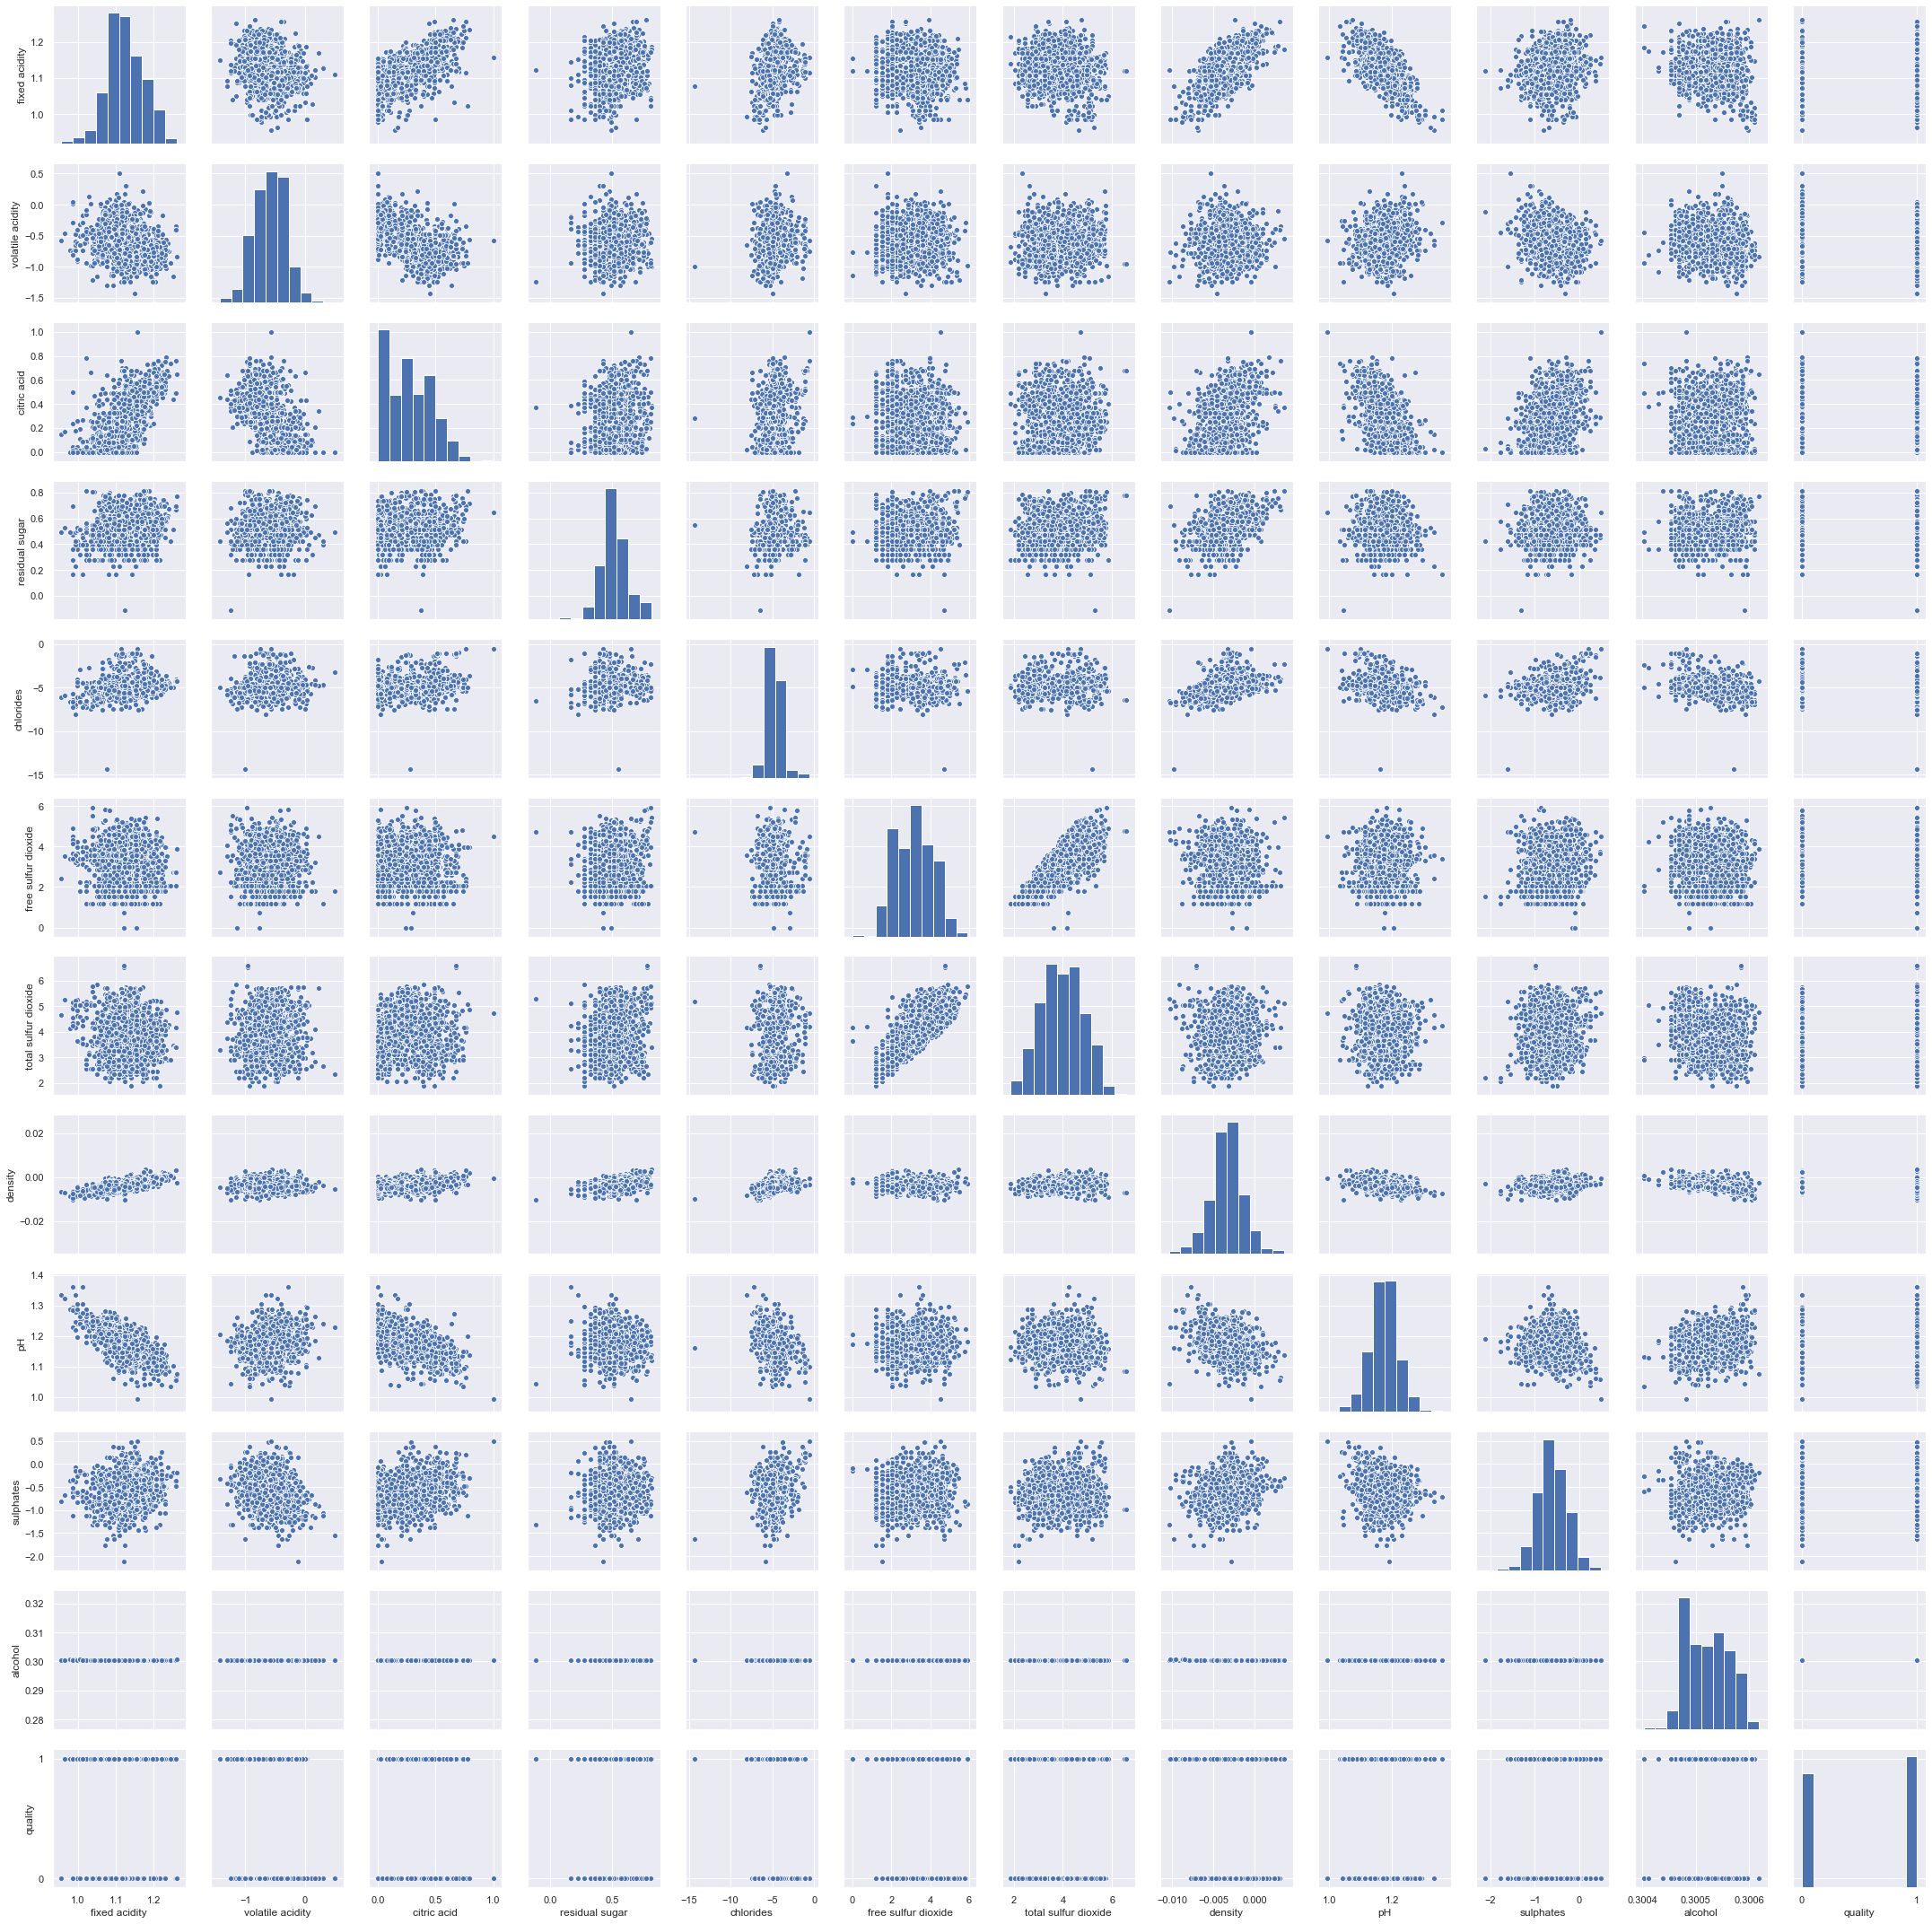

In [152]:
#scatter plot 
sns.pairplot(data)

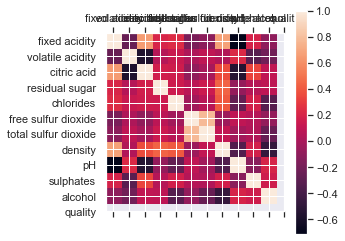

In [153]:
plt.matshow(data.corr())
plt.xticks(range(len(data.columns)), data.columns)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.show()

# Data Preprocessing

In [5]:
#Transformation
def transform(df, variable):
        df[variable] = (df[variable] - df[variable].mean()) / (df[variable].max() - df[variable].min())
transform(data, "fixed acidity")
transform(data, "volatile acidity")
transform(data, "citric acid")
transform(data, "residual sugar")
transform(data, "chlorides")
transform(data, "free sulfur dioxide")
transform(data, "total sulfur dioxide")
transform(data, "density")
transform(data, "pH")
transform(data, "sulphates")
transform(data, "alcohol")


In [6]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256146,0.654828,0.207587,0.241508,-0.172595,-0.109304,0.673242,-0.713366,0.192642,-0.102551,0.104743
volatile acidity,-0.256146,1.000000,-0.566312,0.049932,0.136235,0.023673,0.090428,0.037299,0.228042,-0.315416,-0.212911,-0.393919
citric acid,0.654828,-0.566312,1.000000,0.176034,0.160069,-0.085827,-0.001728,0.363176,-0.544023,0.331910,0.099188,0.226373
residual sugar,0.207587,0.049932,0.176034,1.000000,0.156405,0.081214,0.147879,0.439309,-0.074594,0.050129,0.087638,0.029436
chlorides,0.241508,0.136235,0.160069,0.156405,1.000000,-0.018714,0.068718,0.404855,-0.271137,0.179922,-0.319972,-0.188955
free sulfur dioxide,-0.172595,0.023673,-0.085827,0.081214,-0.018714,1.000000,0.780299,-0.039244,0.093850,0.053825,-0.083997,-0.050697
total sulfur dioxide,-0.109304,0.090428,-0.001728,0.147879,0.068718,0.780299,1.000000,0.103296,-0.018659,0.038291,-0.251649,-0.172068
density,0.673242,0.037299,0.363176,0.439309,0.404855,-0.039244,0.103296,1.000000,-0.340301,0.177165,-0.470093,-0.177231
pH,-0.713366,0.228042,-0.544023,-0.074594,-0.271137,0.093850,-0.018659,-0.340301,1.000000,-0.116416,0.203458,-0.057566
sulphates,0.192642,-0.315416,0.331910,0.050129,0.179922,0.053825,0.038291,0.177165,-0.116416,1.000000,0.163327,0.341556


# Data Classification 

In [7]:
#if quality is less then or equal to 5 set as 0 else 1
datamean=pd.DataFrame()
data["quality"]=["0" if i<=5 else "1"  for i in data['quality']]
print(data['quality'].unique())
Counter(data['quality'])

['0' '1']


Counter({'0': 744, '1': 855})

In [57]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Apply algorithm 

In [8]:
y = data["quality"]
x = data.drop('quality',axis=1)
X_train, X_test, y_train, y_test = ms.train_test_split(x, y, test_size = 0.2, random_state = 0)
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,0.218119,-0.031512,0.159024,-0.020791,0.148283,0.185096,0.149814,0.107250,-0.111508,0.111704,0.103389
1032,0.005452,0.207110,-0.270976,0.187290,0.038615,-0.222094,-0.243503,0.131856,0.041408,-0.113877,-0.140795
1002,0.096461,-0.199614,0.059024,-0.031786,-0.057536,-0.003664,-0.080677,-0.116208,-0.037931,0.160477,0.222400
487,0.179057,0.097654,0.089024,-0.096839,-0.103720,-0.222094,-0.243503,0.107250,-0.111508,-0.312646,-0.045147
979,0.296596,-0.048015,0.219024,-0.254700,-0.014506,-0.327025,-0.445704,0.012456,-0.144901,0.005068,0.035290
...,...,...,...,...,...,...,...,...,...,...,...
794,0.172172,-0.221850,0.269024,0.018008,-0.049569,-0.148606,-0.090181,-0.105035,-0.111508,-0.113877,0.299445
813,-0.132087,-0.100342,-0.030976,-0.020791,0.053500,-0.268889,-0.409561,-0.156559,0.103149,-0.049119,0.187193
1322,0.096461,-0.147778,0.149024,-0.096839,-0.079176,-0.091328,-0.181838,-0.209165,-0.103227,-0.086516,0.187193
704,0.096461,0.174367,-0.230976,-0.165021,-0.005290,-0.268889,-0.243503,0.092740,-0.013869,-0.099935,-0.115271


# Logistic Regression

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("Accuracy:",lr_acc_score*100)
print(classification_report(y_test, lr_predict))

confussion matrix
[[111  37]
 [ 38 134]]
Accuracy: 76.5625
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       148
           1       0.78      0.78      0.78       172

    accuracy                           0.77       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.77      0.77      0.77       320



# Support Vector Machine

In [10]:
cls=SVC(kernel='linear',random_state=0)
cls.fit(X_train,y_train)
svmpred=cls.predict(X_test)
svmpred
cm=confusion_matrix(y_test,svmpred)
print("confussion matrix")
print(cm)
print("\n")
accuracy=accuracy_score(y_test,svmpred)
print("accuracy",accuracy*100)
print(classification_report(y_test,svmpred))

confussion matrix
[[113  35]
 [ 39 133]]


accuracy 76.875
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       148
           1       0.79      0.77      0.78       172

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



# Random Forest

In [11]:
rf = RandomForestClassifier(n_estimators=1000, random_state=23)
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)
rf_predict1=rf.predict(X_train)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("accuracy",rf_acc_score*100)
print(classification_report(y_test,rf_predict))
rf_predict


confussion matrix
[[119  29]
 [ 28 144]]


accuracy 82.1875
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       148
           1       0.83      0.84      0.83       172

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



array(['1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1',
       '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0',
       '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1',
       '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0',
       '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0',
       '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0',
       '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0',
       '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1',
       '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1',
       '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0',
       '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1',
       '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0

In [168]:
conclusion = pd.DataFrame({'Models': ["Logestic Regression","Support Vector Machine","Random Forest"],
                           'Accuracy': [lr_acc_score,accuracy,rf_acc_score]})
conclusion

,Models,Accuracy
0,Logestic Regression,0.765625
1,Support Vector Machine,0.768750
2,Random Forest,0.821875


# Ensembling

# StackingCV Classifier

In [169]:
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[cls,rf,lr],meta_classifier= rf ,random_state=42)
scv.fit(X_train,y_train)
predicted_y = scv.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y) * 100
print("The accuracy score is " + str(accuracy))

The accuracy score is 82.1875


# Bagging

In [170]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(base_estimator=rf, n_estimators=10, random_state=123)
bc.fit(X_train,y_train)
predicted_y = bc.predict(X_test)
accuracy2 = accuracy_score(y_test, predicted_y) * 100
print("The accuracy score is " + str(accuracy2))

The accuracy score is 80.9375


# Voting classifier

In [171]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('svc',cls), ('LR', lr)], voting='hard')
vc.fit(X_train,y_train)
predicted_y = vc.predict(X_test)
accuracy3 = accuracy_score(y_test, predicted_y) * 100
print("The accuracy score is " + str(accuracy3))

The accuracy score is 75.625


In [172]:
conclusion = pd.DataFrame({'Models': ["Voting Classifier","Bagging Classifier","StackingCV Classifier"],
                           'Accuracy': [accuracy3,accuracy2,accuracy]})
conclusion

,Models,Accuracy
0,Voting Classifier,75.6250
1,Bagging Classifier,80.9375
2,StackingCV Classifier,82.1875


# Conclusion:Random Forest give us good prediction accuracy for the Wine Quality prediction

# User interface

In [14]:
import tkinter as tk  
from functools import partial  
root = tk.Tk()  
root.geometry('1000x500')
root.title("GUI")
lbl1=tk.Label(root,text="Prediction quality of wine using Machine Learning",bg="black",fg="white")
lbl1.place(x=350,y=10)
lbl1=tk.Label(root,text="Enter the values for the labels",bg="black",fg="white")
lbl1.place(x=400,y=40)


def call_result(label_result, n1, n2,n3, n4,n5, n6,n7, n8,n9, n10,n11):  
    num1 = (n1.get())  
    num2 = (n2.get())  
    num3 = (n3.get())  
    num4 = (n4.get())
    num5 = (n5.get())  
    num6 = (n6.get())
    num7 = (n7.get())  
    num8 = (n8.get())
    num9 = (n9.get())  
    num10 = (n10.get())
    num11 = (n11.get())  
    result = [num1, num2, num3, num4, num5, num6, num7, num8, num9, num10, num11]
    result = list(map(float, result))
    inputval = [result]
    rf_predict = rf.predict(inputval) 
    label_result.config(text="output = %d" % rf_predict)  
    return  
   
number1 = tk.StringVar()  
number2 = tk.StringVar()  
number3 = tk.StringVar()  
number4 = tk.StringVar()
number5 = tk.StringVar()  
number6 = tk.StringVar()
number7 = tk.StringVar()  
number8 = tk.StringVar()
number9 = tk.StringVar()  
number10 = tk.StringVar()
number11 = tk.StringVar()  
number12 = tk.StringVar()


labelNum1 = tk.Label(root, text="fixed acidity").grid(row=4, column=1)  
labelNum2 = tk.Label(root, text="volatile acidity").grid(row=5, column=1)
labelNum3 = tk.Label(root, text="citric acid").grid(row=6, column=1) 
labelNum4 = tk.Label(root, text="residual sugar").grid(row=7, column=1)  
labelNum5 = tk.Label(root, text="chlorides").grid(row=8, column=1)
labelNum6 = tk.Label(root, text="free sulfur dioxide").grid(row=9, column=1)  
labelNum7 = tk.Label(root, text="total sulfur dioxide").grid(row=10, column=1)
labelNum8 = tk.Label(root, text="density").grid(row=11, column=1)  
labelNum9 = tk.Label(root, text="pH").grid(row=12, column=1)
labelNum10 = tk.Label(root, text="sulphates").grid(row=13, column=1)  
labelNum11 = tk.Label(root, text="alcohol").grid(row=14, column=1)
 
labelResult = tk.Label(root)  
  
labelResult.grid(row=16, column=8)  
  
entryNum1 = tk.Entry(root, textvariable=number1).grid(row=4, column=4)  
entryNum2 = tk.Entry(root, textvariable=number2).grid(row=5, column=4) 
entryNum3 = tk.Entry(root, textvariable=number3).grid(row=6, column=4)  
entryNum4 = tk.Entry(root, textvariable=number4).grid(row=7, column=4) 
entryNum5 = tk.Entry(root, textvariable=number5).grid(row=8, column=4)  
entryNum6 = tk.Entry(root, textvariable=number6).grid(row=9, column=4) 
entryNum7 = tk.Entry(root, textvariable=number7).grid(row=10, column=4)  
entryNum8 = tk.Entry(root, textvariable=number8).grid(row=11, column=4) 
entryNum9 = tk.Entry(root, textvariable=number9).grid(row=12, column=4)  
entryNum10 = tk.Entry(root, textvariable=number10).grid(row=13, column=4) 
entryNum11 = tk.Entry(root, textvariable=number11).grid(row=14, column=4)  

call_result = partial(call_result, labelResult, number1, number2, number3, number4, number5, number6, number7, number8,
                     number9, number10, number11)  
  
buttonCal = tk.Button(root, text="predict", command=call_result).grid(row=16, column=7)  
  
root.mainloop()  

In [178]:
#x=[[0.218119,-0.031512,0.159024,-0.020791,	0.148283,	0.185096,	0.149814,	0.107250,	-0.111508,	0.111704,	0.103389]]
#x=[[0.005452,	0.207110,	-0.270976,	0.187290,	0.038615,	-0.222094,	-0.243503,	0.131856,	0.041408,	-0.113877,	-0.140795]]
#x=[[0.096461,	-0.199614,	0.059024,	-0.031786,	-0.057536,	-0.003664,	-0.080677,	-0.116208,	-0.037931,	0.160477,	0.222400]]
z=rf.predict(x)
z

array(['1'], dtype=object)